In [77]:
import numpy as np
import random
import math
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
occ_grid = np.full((30,30,2), False)
obstacles = generate_obstacles(occ_grid, N=5, radius=3)
p_start = Point(5.0,2.0,1.56)
p_goal = Point(22.0,28.0)

In [140]:
def create_sector(center, start_angle, end_angle, radius, steps=200):
    def polar_point(origin_point, angle,  distance):
        return [origin_point.x + math.sin(math.radians(angle)) * distance, origin_point.y + math.cos(math.radians(angle)) * distance]

    if start_angle > end_angle:
        start_angle = start_angle - 360
    else:
        pass
    step_angle_width = (end_angle-start_angle) / steps
    sector_width = (end_angle-start_angle) 
    segment_vertices = []

    segment_vertices.append(polar_point(center, 0,0))
    segment_vertices.append(polar_point(center, start_angle,radius))

    for z in range(1, steps):
        segment_vertices.append((polar_point(center, start_angle + z * step_angle_width,radius)))
    segment_vertices.append(polar_point(center, start_angle+sector_width,radius))
    segment_vertices.append(polar_point(center, 0,0))
    return Polygon(segment_vertices)

def check_obstacle(p, r, theta, direction, obstacles):
    distance = np.inf
    for obstacle in obstacles:
        if obstacle.distance(p) > r:
            continue
        else:
            start_angle = direction - theta / 2
            end_angle = direction + theta / 2
            sector = create_sector(p, start_angle, end_angle, r)
            if sector.intersection(obstacle).area > 0:
                cur_distance = obstacle.distance(p)
                if cur_distance < distance:
                    print(cur_distance)
                    distance = cur_distance
    return distance

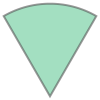

In [141]:
create_sector(p_start, -30, 30, 10)

In [145]:
check_obstacle(p_start, 10, 30, 45, obstacles)

inf

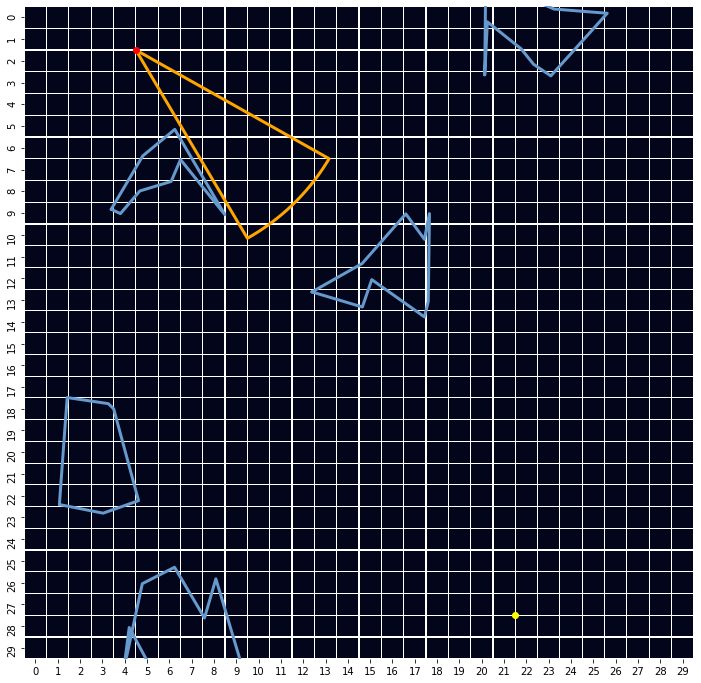

In [143]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

x, y = create_sector(p_start, 30, 60, 10).exterior.xy
ax.plot(x, y, color='orange', alpha=1,
linewidth=3, solid_capstyle='round', zorder=2)

for obstacle in obstacles:
    x, y = obstacle.exterior.xy
    ax.plot(x, y, color='#6699cc', alpha=1,
    linewidth=3, solid_capstyle='round', zorder=2)
sns.heatmap(np.zeros(shape=occ_grid.shape[:2]), linewidth=0.2, ax=ax, cbar=False)
x1, y1 = p_start.xy
x2, y2 = p_goal.xy
ax.plot(x1, y1, 'ro', color="red")
ax.plot(x2, y2, 'ro', color="yellow")
plt.show()

In [75]:
def generate_obstacles(occ_grid, N, radius=3):
    n = occ_grid.shape[0]
    obstacles = []
    for i in range(N):
        point = Point(random.random() * n, random.random() * n)
        while True:
            for obstacle in obstacles:
                if obstacle.distance(point) < radius:
                    point = Point(random.random() * n, random.random() * n)
                    break
            break
        num_points = random.randint(5, 10)
        points = [(point.x + a, point.y + b) for (a, b) in np.random.uniform(low=-radius, high=radius, size=(num_points, 2))]
        points = sorted(points, key=lambda x: np.arcsin((x[0] - point.x) / radius) if x[1] - point.y > 0 else 2*math.pi - np.arcsin((x[0] - point.x) / radius))
        points.append(points[0])
        obstacle = Polygon(points)
        obstacles.append(obstacle)
    return obstacles

In [57]:
num_points = 10
radius = 5
np.random.uniform(low=-radius, high=radius, size=(num_points, 2))
N=5
n = occ_grid.shape[0]
obstacles = []
for i in range(N):
    point = Point(random.random() * n, random.random() * n)
    while True:
        for obstacle in obstacles:
            if obstacle.distance(point) < radius:
                point = Point(random.random() * n, random.random() * n)
                break
        break
    num_points = random.randint(5, 10)
    points = [(point.x + a, point.y + b) for (a, b) in np.random.uniform(low=-radius, high=radius, size=(num_points, 2))]
    points = sorted(points, key=lambda x: np.arcsin((x[0] - point.x) / radius) if x[1] - point.y > 0 else 2*math.pi - np.arcsin((x[0] - point.x) / radius))
    points.append(points[0])
    obstacle = Polygon(points)
    obstacles.append(obstacle)

In [72]:
obstacles[0].coords

NotImplementedError: Component rings have coordinate sequences, but the polygon does not

In [62]:

for x in points:
    print(np.arcsin((x[0] - point.x) / radius) if x[1] - point.y > 0 else 2*math.pi - np.arcsin((x[0] - point.x) / radius))

-0.8925368887366404
-0.48243599052542574
0.05203211971382823
0.0657086908820836
6.608067386470436
6.628913587692025
6.863949121149251
7.067406682775991
-0.8925368887366404


In [40]:
(x[0] - point.x) / (x[1] - point.y)

19.78683064862676